In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
%matplotlib inline

# DATA EXTRAPOLATION

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


In [4]:
internet_df  = pd.read_csv('../data/internet_use.csv')
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes,Unnamed: 4,Unnamed: 5
0,Afghanistan,2014,6.39,NaN,NaN,NaN
1,Afghanistan,2013,5.9,NaN,NaN,NaN
2,Afghanistan,2012,5.454545455,NaN,NaN,NaN
3,Afghanistan,2011,5,NaN,NaN,NaN
4,Afghanistan,2010,4,NaN,NaN,NaN
5,Afghanistan,2009,3.55,NaN,NaN,NaN


In [5]:
gdp_df.shape

(6732, 4)

In [6]:
internet_df.shape

(4677, 6)

    gdp_df has 6732 rows and 4 columns
    internet_df has 4677 columns and 6 columns

In [7]:
print(gdp_df.dtypes)

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object


In [8]:
print(internet_df.dtypes)

Country or Area     object
Year                object
Value               object
Value Footnotes     object
Unnamed: 4         float64
Unnamed: 5          object
dtype: object


In [9]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,NaN,NaN,NaN,NaN
6730,footnoteSeqID,Footnote,NaN,NaN
6731,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [10]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes,Unnamed: 4,Unnamed: 5
4667,171,Internet Dial-up customers.,NaN,NaN,NaN,NaN
4668,172,Population age 16+ using the Internet in the l...,NaN,NaN,NaN,NaN
4669,173,Population age 16+ using internet in the last ...,NaN,NaN,NaN,NaN
4670,174,"U.S. Census Bureau, Table 2. Reported Internet...",NaN,NaN,NaN,NaN
4671,175,Includes individuals 3 years and older,NaN,NaN,NaN,NaN
4672,176,NTIA/CPS survey.,NaN,NaN,NaN,NaN
4673,177,"Pew Internet Project, Internet",Broadband and cell phone statistics,” January 5,2010.0,http://www.pewinternet.org/~/media//Files/Rep...
4674,178,Estimated based on Survey's results. Populatio...,NaN,NaN,NaN,NaN
4675,179,Preliminary. Country estimate.,NaN,NaN,NaN,NaN
4676,180,The methodology used to estimated the figure f...,NaN,NaN,NaN,NaN


    gdp_df has a blank row in row 6729 and footnotes in rows 6730 & 6731
    internet_df has data that doesn't correspond to info in gdp_df in the last 10 rows of the dataset    

In [11]:
gdp_df.drop(columns=['Value Footnotes'])
gdp_df.head(2)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN


The Value Footnotes column wasn't dropped using gdp_df.drop(columns=['Value Footnotes'])
I decided to clean the columns by adding an _ to columns with multiple words. I had to redefine the df with the drop function in order for the column to drop, which corrected the issue. gdp_df = gdp_df.drop(['value_footnotes'], axis=1).

In [12]:
gdp_df.columns = gdp_df.columns.str.strip().str.lower().str.replace(' ', '_')
gdp_df.head(2)

,country_or_area,year,value,value_footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN


In [13]:
gdp_df = gdp_df.drop(['value_footnotes'], axis=1)
gdp_df.head(2)

,country_or_area,year,value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636


In [14]:
# I redefined internet_df with the drop function, but used a different way of telling the df to drop the column.
# internet_df = internet_df.drop(columns=['Value Footnotes'])

internet_df = internet_df.drop(columns=['Value Footnotes'])
internet_df.head(2)

,Country or Area,Year,Value,Unnamed: 4,Unnamed: 5
0,Afghanistan,2014,6.39,NaN,NaN
1,Afghanistan,2013,5.9,NaN,NaN


In [15]:
#per Taylor Perkins, the Unnamed Columns can be dropped
internet_df = internet_df.drop(columns=['Unnamed: 4', 'Unnamed: 5'])
internet_df.head(2)

,Country or Area,Year,Value
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.9


Change the Column Names

In [16]:
gdp_df = gdp_df.rename(columns = {'country_or_area': 'Country', 'year':'Year', 'value':'GDP_Per_Capita'})
gdp_df.head(2)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636


In [17]:
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'year':'Year', 'value':'Internet_Users_Pct'})
internet_df.head(2)

,Country,Year,Value
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.9


In [18]:
#my previous code didn't work because I used a lowercase v in value

internet_df = internet_df.rename(columns = {'Value':'Internet_Users_Pct'})
internet_df.head(2)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.9


In [19]:
#df = df.drop([0, 1]) - to drop rows by index number
gdp_df = gdp_df.drop([6729, 6730, 6731])
gdp_df.tail()

,Country,Year,GDP_Per_Capita
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849
6728,Zimbabwe,1990,2819.549467


In [20]:
 # I'm deleting a range of rows by using df.loc[x:y] for slicing purposes
# x = starting row, y = ending row

x=4495
y=4676
internet_df.loc[x:y]
internet_df.drop(internet_df.loc[x:y].index, inplace=True)
internet_df.tail()

,Country,Year,Internet_Users_Pct
4490,Zimbabwe,1997,0.033080327
4491,Zimbabwe,1996,0.016790484
4492,Zimbabwe,1995,0.00768354
4493,Zimbabwe,1994,0.00173928
4494,Zimbabwe,1990,0


In [21]:
gdp_df.shape

(6729, 3)

In [22]:
internet_df.shape

(4495, 3)

In [23]:
# I want to check to see if each Country listed in gdp_df is in internet_df before merging them.
# df1['column_name'].isin(df2['same_column_name']).value_counts()
# the difference should be the same as the difference in the number of rows from gdp_df and internet_df: (6729-4495 = 1989)

gdp_df['Country'].isin(internet_df['Country']).value_counts()

True     4740
False    1989
Name: Country, dtype: int64

Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.
#you want to answer the questions from an overall standpoint (outer join) until you have to answer questions that compare gdp to internet (inner join)

1. don't use concat because the data in both dfs isn't exactly the same. For ex., the third column consists of different data for each df. 
2. compare the new shape after the merge


This code produced an error that wasn't reading 'GDP_Per_Capita' in the index.

gdp_and_internet_use = pd.merge(df1,
                  df2[['column1', 'column2', 'column3']], - #columns you want to keep
                  on='common_column',  - #common column to join on
                  how='left') - #left join like in SQL

gdp_and_internet_use = pd.merge(gdp_df,
                  internet_df[['Country', 'Year', 'GDP_Per_Capita', 'Internet_Users_Pct']],  #columns you want to keep
                  on='Country',  #common column to join on
                  how='left')


In [24]:
#I originally used a left join since I wanted to keep everything from both datasets and where there was missing data, a NaN would be shown
#The head result gave me what I expected

#outer - cuts Zimbabwe off and the tail shows Virgin Islands (U.S.). The shape is 7705,4. However, it also leaves Bermuda in the Top 5 Countries in terms of internet usage, 
#which is asked about later in the exercise. Outer give you ALL of the data.

#inner - cuts off 2015-2018 for Afghanistan, but shows all of Zimbabwe on the tail. The shape is 3519,4 because it's only showing data
#where there's info for gdp_df and internet_df. The NaN values for either column aren't included.

# - I chose inner since we have to compare % of Internet Usage vs. GDP per Capita later in the exercise.
# - We wouldn't want to be comparing countries/years where one of these values is missing, i.e. Internet Usage

#left - gives you all the years for Afghanistan and Zimbabwe. The shape is 6729,4, which is the original shape of gdp_df with NaN values for wherever
#data is missing from internet_df. 

gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


In [25]:
#The tail gave me what I expected because in the internet_df, Zimbabwe is missing data for 1991-1993
#However, there's GDP data from gdp_df for each year for Zimbabwe

gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948368986
7701,Virgin Islands (U.S.),1996,NaN,4.647185664
7702,Virgin Islands (U.S.),1995,NaN,2.801957634
7703,Virgin Islands (U.S.),1994,NaN,0.940645283
7704,Virgin Islands (U.S.),1990,NaN,0


In [26]:
gdp_and_internet_use.shape

(7705, 4)

In [27]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7705 entries, 0 to 7704
Data columns (total 4 columns):
Country               7705 non-null object
Year                  7705 non-null object
GDP_Per_Capita        6729 non-null float64
Internet_Users_Pct    4495 non-null object
dtypes: float64(1), object(3)
memory usage: 301.0+ KB


Subsetting the df to only include data from 2004, 2009 & 2014

In [28]:
# new_df = original_df["Gender"].isin(["Male"]) 
  
# original_df[new_df] 

#previously, the code was retrieving an empty dataset based on the Year because Year was still an object and not a float.
#I had to add "" around each Year in order to produce results. 

gdp_and_internet_use_sub = gdp_and_internet_use["Year"].isin(["2004","2009","2014"])
gdp_and_internet_use[gdp_and_internet_use_sub].head(10)


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.39
9,Afghanistan,2009,1502.354073,3.55
14,Afghanistan,2004,1025.208245,0.10580903
21,Albania,2014,10700.993220,60.1
26,Albania,2009,9525.377979,41.2
31,Albania,2004,7001.054082,2.420387798
50,Algeria,2014,13557.769760,18.09
55,Algeria,2009,12697.690780,11.23
60,Algeria,2004,11845.170510,4.634475088
79,Angola,2014,6813.052106,21.26


In [29]:
#Listing each year I wanted with an "or" gave me the following error: AttributeError: 'DataFrame' object has no attribute 'year'
#gdp_and_internet_use[gdp_and_internet_use.Year == 2004] didn't separate the 2004 data out

#df.query(''Year == "m" ") didn't work until I created a new df for the subset of data
#I had to use " " around the year because I haven't converted Year from an object to a float. That's done later on in the exercise.

gdp_internet_2004 = gdp_and_internet_use.query('Year == "2004"')
gdp_internet_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2004,1025.208245,0.10580903
31,Albania,2004,7001.054082,2.420387798
60,Algeria,2004,11845.170510,4.634475088
89,Angola,2004,4604.657044,0.464814618
118,Antigua and Barbuda,2004,21161.123530,24.26654372


In [30]:
#df = df.reset_index(drop=True)
#drop=True keeps the original index from populating as another column

gdp_internet_2004 = gdp_internet_2004.reset_index(drop=True)
gdp_internet_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2004,1025.208245,0.10580903
1,Albania,2004,7001.054082,2.420387798
2,Algeria,2004,11845.170510,4.634475088
3,Angola,2004,4604.657044,0.464814618
4,Antigua and Barbuda,2004,21161.123530,24.26654372


In [31]:
#I wanted to make sure I created a df and not a Series
print(type(gdp_internet_2004))

<class 'pandas.core.frame.DataFrame'>


In [32]:
gdp_internet_2009 = gdp_and_internet_use.query('Year == "2009"')
gdp_internet_2009 = gdp_internet_2009.reset_index(drop=True)
gdp_internet_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2009,1502.354073,3.55
1,Albania,2009,9525.377979,41.2
2,Algeria,2009,12697.690780,11.23
3,Angola,2009,6292.534856,6
4,Antigua and Barbuda,2009,22568.626530,42


In [33]:
gdp_internet_2014 = gdp_and_internet_use.query('Year == "2014"')
gdp_internet_2014 = gdp_internet_2014.reset_index(drop=True)
gdp_internet_2014.head(20)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.39
1,Albania,2014,10700.993220,60.1
2,Algeria,2014,13557.769760,18.09
3,Angola,2014,6813.052106,21.26
4,Antigua and Barbuda,2014,20440.540560,64
5,Arab World,2014,15286.726820,NaN
6,Argentina,2014,18935.002500,64.7
7,Armenia,2014,7954.195331,46.3
8,Aruba,2014,36172.933350,83.78
9,Australia,2014,43651.103130,84.56


In [34]:
#My text string didn't work using .format, but I did get the type for all three subsets of data to make sure they were dfs
# print("The type for the 2004 data is {}".format(sub_2004_data.info()))
# print()
# print("The type for the 2009 data is {}".format(sub_2009_data.info()))
# print()
# print("The type for the 2014 data is {}".format(sub_2014_data.info()))

gdp_internet_2004.info()
print()
gdp_internet_2009.info()
print()
gdp_internet_2014.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 4 columns):
Country               278 non-null object
Year                  278 non-null object
GDP_Per_Capita        238 non-null float64
Internet_Users_Pct    199 non-null object
dtypes: float64(1), object(3)
memory usage: 8.8+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 4 columns):
Country               279 non-null object
Year                  279 non-null object
GDP_Per_Capita        241 non-null float64
Internet_Users_Pct    203 non-null object
dtypes: float64(1), object(3)
memory usage: 8.8+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 4 columns):
Country               278 non-null object
Year                  278 non-null object
GDP_Per_Capita        240 non-null float64
Internet_Users_Pct    202 non-null object
dtypes: float64(1), object(3)
memory usage: 8.8+ KB



Which country had the highest percentage of internet users in 2014? What was the percentage? Repeat for 2004 and 2009.

1. 2014 - Iceland - 98.16%
2. 2004 - Sweden - 83.89%
3. 2009 - Iceland - 93.00%


To sort with missing values showing first = sort_na_first = df.sort_values('column_name',na_position='first')
To sort a column in DESC (highest to lowest) order = df_sort = df.sort_values('column_name',ascending=False)
To sort a column in ASC (lowest to highest) order = df_sort = df.sort_values('column_name',ascending=True)  

#Using df_sorted = df.sort_values('column_name', ascending=False) 
#didn't sort the column in the correct order until I changed the datatype of the Internet_Users_Pct column from an object to a float

In [35]:
gdp_internet_2004.Internet_Users_Pct = gdp_internet_2004.Internet_Users_Pct.astype(float)
gdp_internet_2004 =gdp_internet_2004.sort_values('Internet_Users_Pct', ascending=False)
gdp_internet_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
207,Sweden,2004,40177.85041,83.89
91,Iceland,2004,38893.37880,83.88
50,Denmark,2004,43670.44620,80.93
160,Norway,2004,61612.27563,77.69
260,Korea (Rep. of),2004,NaN,72.70


In [36]:
gdp_internet_2009.Internet_Users_Pct = gdp_internet_2009.Internet_Users_Pct.astype(float)
gdp_internet_2009 = gdp_internet_2009.sort_values('Internet_Users_Pct', ascending=False)
gdp_internet_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
91,Iceland,2009,41505.08483,93.00
161,Norway,2009,62617.15361,92.08
210,Sweden,2009,41327.62625,91.00
154,Netherlands,2009,45724.86276,89.63
128,Luxembourg,2009,89098.73426,87.31


In [37]:
gdp_internet_2014.Internet_Users_Pct = gdp_internet_2014.Internet_Users_Pct.astype(float)
gdp_internet_2014 = gdp_internet_2014.sort_values('Internet_Users_Pct', ascending=False)
gdp_internet_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
89,Iceland,2014,42774.88885,98.16
242,Bermuda,2014,NaN,96.80
159,Norway,2014,63328.25953,96.30
49,Denmark,2014,45057.08345,95.99
240,Andorra,2014,NaN,95.90


Which country had the *lowest* percentage of internet users in 2014? What was the percentage? Repeat for 2004 and 2009.
To sort in ASC order, use ascending=True
1. 2014: Dem. People's Rep. of Korea - 0%
2. 2004: Dem. People's Rep. of Korea - 0%
3. 2009: Dem. People's Rep. of Korea - 0%

In [38]:
gdp_internet_2014 = gdp_internet_2014.sort_values('Internet_Users_Pct', ascending=True)
gdp_internet_2014.head(2)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
249,Dem. People's Rep. of Korea,2014,NaN,0.00
252,Eritrea,2014,NaN,0.99


In [39]:
gdp_internet_2004 = gdp_internet_2004.sort_values('Internet_Users_Pct', ascending=True)
gdp_internet_2004.head(2)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
246,Dem. People's Rep. of Korea,2004,NaN,0.000000
150,Myanmar,2004,1999.710075,0.024337


In [40]:
gdp_internet_2009 = gdp_internet_2009.sort_values('Internet_Users_Pct', ascending=True)
gdp_internet_2009.head(2)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
249,Dem. People's Rep. of Korea,2009,NaN,0.000000
217,Timor-Leste,2009,9275.529371,0.185252


Which country had the highest gdp per capita in 2014? What was the gdp per capita?
1. China
2. 130439.1067

In [41]:
# To sort a column in DESC (highest to lowest) order = df_sort = df.sort_values('column_name',ascending=False)
# To sort a column in ASC (lowest to highest) order = df_sort = df.sort_values('column_name',ascending=True)  

gdp_2014_high = gdp_internet_2014.sort_values('GDP_Per_Capita', ascending=False)
gdp_2014_high.head(2)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
127,"Macao SAR, China",2014,130439.1067,NaN
176,Qatar,2014,116693.5077,91.49


Which country had the lowest gdp per capita in 2014? What was the gdp per capita?
1. Central African Republic
2. 672.681648

In [42]:
gdp_2014_low = gdp_internet_2014.sort_values('GDP_Per_Capita', ascending=True)
gdp_2014_low.head(2)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
35,Central African Republic,2014,672.681648,NaN
27,Burundi,2014,768.469837,1.38


# PLOTTING

Scatter Plots for 2004, 2009 & 2014 Percent Using the Internet vs GDP Per Capita

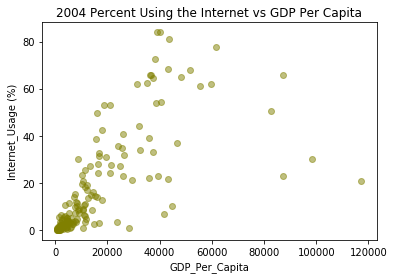

In [43]:
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# plt.title('Scatter plot pythonspot.com')
# plt.xlabel('x')
# plt.ylabel('y')
#plt.legend(loc = "upper left")

# plt.scatter(gdp_internet_2004.Internet_Users_Pct, gdp_internet_2004.GDP_Per_Capita, c='olive', alpha=0.5) - this flipped the graph
plt.scatter(gdp_internet_2004.GDP_Per_Capita, gdp_internet_2004.Internet_Users_Pct, c='olive', alpha=0.5)
plt.title('2004 Percent Using the Internet vs GDP Per Capita')
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Usage (%)')
plt.show()

# ax1 = df.plot.scatter(x='length',
#                       y='width',
#                       c='DarkBlue')

2004 Scatterplot Observation:
1. The lower the GDP, the lower the internet usage percentage.
2. There are some countries that have GDP on the high end, but the internet usage is lower than those with a mid-range GDP.

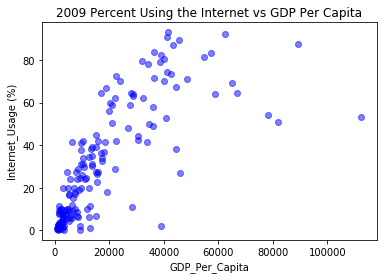

In [44]:
plt.scatter(gdp_internet_2009.GDP_Per_Capita, gdp_internet_2009.Internet_Users_Pct, c='blue', alpha=0.5)
plt.title('2009 Percent Using the Internet vs GDP Per Capita')
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Usage (%)')
plt.show()

2009 Scatterplot Observation:
1. The lower the GDP, the lower the internet usage percentage.
2. There's an outlier with a GDP 100,000<, but that country doesn't have the highest internet usage.

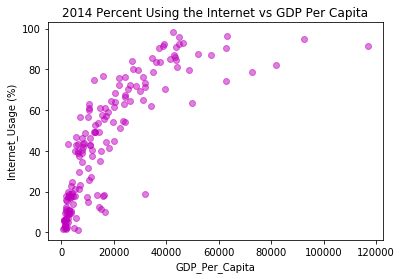

In [45]:
plt.scatter(gdp_internet_2014.GDP_Per_Capita, gdp_internet_2014.Internet_Users_Pct, c='m', alpha=0.5)
plt.title('2014 Percent Using the Internet vs GDP Per Capita')
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Usage (%)')
plt.show()

2014 Scatterplot Observation:
1. The lower the GDP, the lower the internet usage percentage.
2. There's an outlier with a GDP 120,000<, but that country doesn't have the highest internet usage.
3. As GDP increase, internet usage increases.

# To See All 3 Scatterplots on One Graph

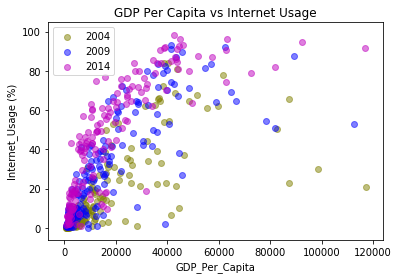

<Figure size 720x720 with 0 Axes>

In [46]:
plt.scatter(gdp_internet_2004.GDP_Per_Capita, gdp_internet_2004.Internet_Users_Pct, c='olive', alpha=0.5)
plt.scatter(gdp_internet_2009.GDP_Per_Capita, gdp_internet_2009.Internet_Users_Pct, c='b', alpha=0.5)
plt.scatter(gdp_internet_2014.GDP_Per_Capita, gdp_internet_2014.Internet_Users_Pct, c='m', alpha=0.5)
plt.title('2014 Percent Using the Internet vs GDP Per Capita')
plt.title('GDP Per Capita vs Internet Usage')
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Usage (%)')
plt.legend(labels = [2004, 2009, 2014])
plt.figure(figsize=(10,10))
plt.show()

# Distribution of the Plots

Look at the distribution of gdp per capita values for 2014. Is it unimodal?
Yes

Look at the distribution of Internet Use for 2014. Is it unimodal?
Yes


C:\Users\brand\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\brand\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


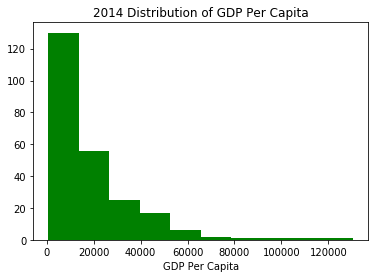

In [47]:
#plt.hist(df.column, bins = ) - histogram
# #plt.hist(df.column, range=(min, max))
# #plt.hist(male_height, density=True) - normalizes proportions
# - plt.xlabel("Name")
# - plt.ylabel('"Name")
#plt.title('Sample from Shoeprint')
#plt.hist(gravel.radius, bins=40, range=(2, 8), density=True)

plt.hist(gdp_internet_2014.GDP_Per_Capita, bins = 10, color='green')
plt.xlabel("GDP Per Capita")

plt.title("2014 Distribution of GDP Per Capita")
plt.show()

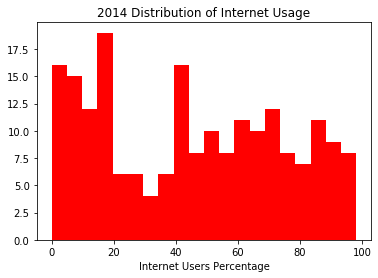

In [48]:
plt.hist(gdp_internet_2014.Internet_Users_Pct, bins = 20, color='red')
plt.xlabel("Internet Users Percentage")

plt.title("2014 Distribution of Internet Usage")
plt.show()

What are the top 5 countries in terms of internet use in 2014?
1. Iceland
2. Bermuda
3. Norway
4. Denmark
5. Andorra

In [49]:
internet_top_5 = gdp_internet_2014.sort_values('Internet_Users_Pct', ascending=False)
internet_top_5.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
89,Iceland,2014,42774.88885,98.16
242,Bermuda,2014,NaN,96.80
159,Norway,2014,63328.25953,96.30
49,Denmark,2014,45057.08345,95.99
240,Andorra,2014,NaN,95.90


In [50]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7705 entries, 0 to 7704
Data columns (total 4 columns):
Country               7705 non-null object
Year                  7705 non-null object
GDP_Per_Capita        6729 non-null float64
Internet_Users_Pct    4495 non-null object
dtypes: float64(1), object(3)
memory usage: 301.0+ KB


In [51]:
# # #df = pd.DataFrame(data=d)

# gdp_internet_dub_df = pd.DataFrame(data=gdp_and_internet_use_sub)
# print()
# gdp_internet_dub_df.info()
# gdp_internet_dub_df.head()

In [52]:
# new_df = original_df["Gender"].isin(["Male"]) 
# original_df[new_df] 

#I wonder if I have to create a new df to call out Country
#gdp_and_internet_use_sub = gdp_and_internet_use["Year"].isin(["2004","2009","2014"])


# I had to call the Countries and the Years.
top_5_internet   = gdp_and_internet_use[(gdp_and_internet_use.Country.isin(["Iceland", "Bermuda", "Norway", "Denmark", "Andorra"]))
                                       & (gdp_and_internet_use.Year.isin(["2004","2009","2014"]))]

top_5_internet = top_5_internet.reset_index(drop=True)
#top_5_internet = gdp_and_internet_use_sub["Country"].isin(["Iceland", "Norway", "Denmark", "Luxembourg", "Netherlands"])
#This gave me the following error: KeyError: 'Country'

# top_5_country_list = ["Iceland", "Norway", "Denmark", "Luxembourg", "Netherlands"]
# top_5_internet = gdp_and_internet_use[gdp_and_internet_use.Country.isin(top_5_country_list)]

top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Bermuda,2009,57151.91913,83.25
1,Bermuda,2004,55452.63888,60.99086701
2,Denmark,2014,45057.08345,95.99
3,Denmark,2009,43382.61569,86.84
4,Denmark,2004,43670.44620,80.93
5,Iceland,2014,42774.88885,98.16
6,Iceland,2009,41505.08483,93
7,Iceland,2004,38893.37880,83.88
8,Norway,2014,63328.25953,96.3
9,Norway,2009,62617.15361,92.08


# Seaborn

Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?
#Answers:
1. Andorra had the greatest growth between 2004 and 2014.
2. I don't have a plotting issue with Bermuda, but in the df printout, the value for Bermuda in 2014 isn't listed with the other Bermuda values.
3. To fix this issue, I can sort the data by Internet_Users_Pct.


1. Bermuda is not in my dataset because I did an inner join.
2. Bermuda is there if I do a left join, which keeps the NaN values.

In [53]:
top_5_internet.Internet_Users_Pct = top_5_internet.Internet_Users_Pct.astype(float)
top_5_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
Country               15 non-null object
Year                  15 non-null object
GDP_Per_Capita        11 non-null float64
Internet_Users_Pct    15 non-null float64
dtypes: float64(2), object(2)
memory usage: 560.0+ bytes


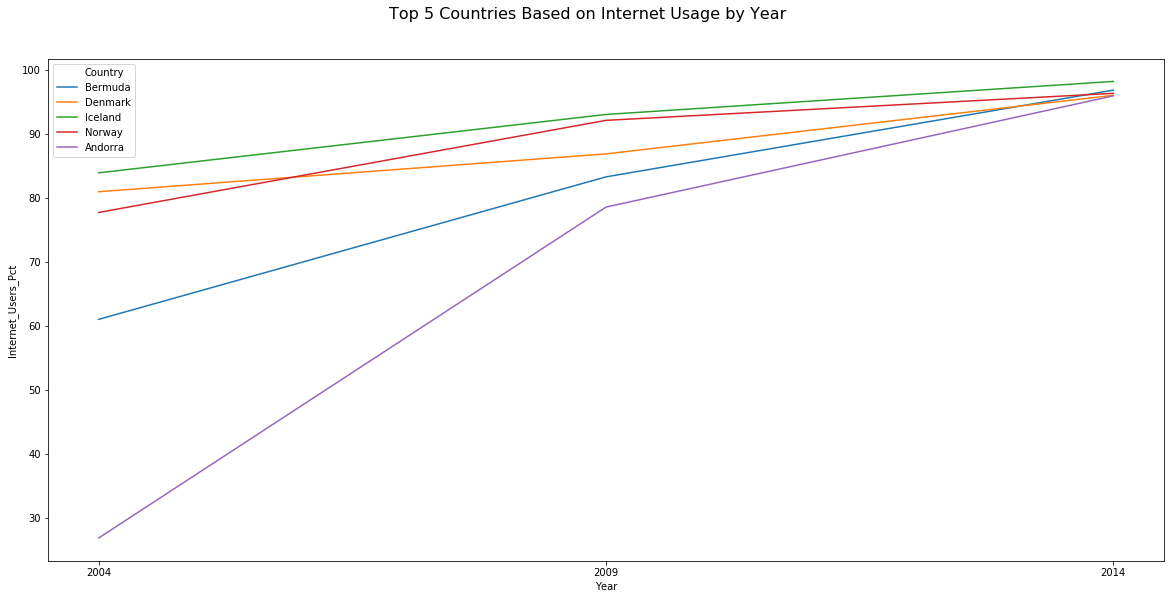

In [54]:

plt.figure(figsize=(20,9) )
g = sns.lineplot(data=top_5_internet, x='Year',y='Internet_Users_Pct', hue = "Country")
plt.subplots_adjust(top=0.9)
plt.suptitle("Top 5 Countries Based on Internet Usage by Year", fontsize = 16)



# # g.map(plt.scatter, "Country", "Internet_Users_Pct")
plt.show()

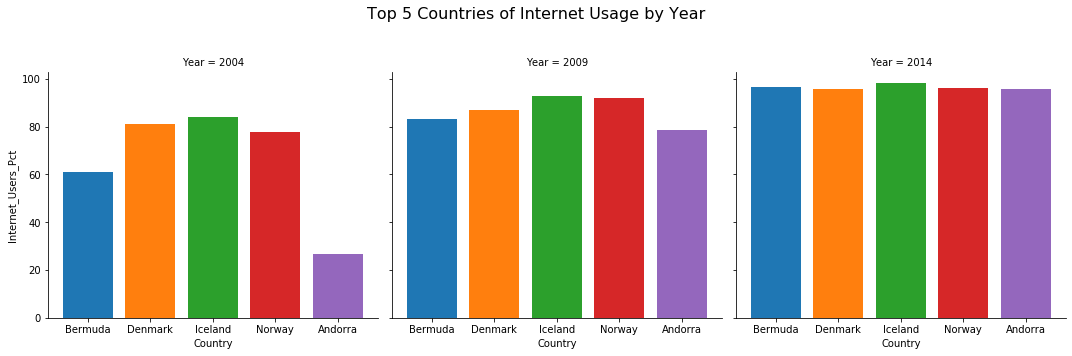

In [55]:
g = sns.FacetGrid(top_5_internet, col="Year", hue = "Country", col_wrap=3, height = 5, legend_out = True)
g.map(plt.bar, "Country", "Internet_Users_Pct")
# g.add_legend
plt.subplots_adjust(top=0.8)
plt.suptitle("Top 5 Countries of Internet Usage by Year", fontsize = 16)

plt.show()

In [56]:
#internet_top_5 = gdp_internet_2014.sort_values('Internet_Users_Pct', ascending=False)
top_5_internet_sorted =top_5_internet.sort_values('Internet_Users_Pct', ascending=False)
top_5_internet_sorted

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Iceland,2014,42774.88885,98.160000
14,Bermuda,2014,NaN,96.800000
8,Norway,2014,63328.25953,96.300000
2,Denmark,2014,45057.08345,95.990000
11,Andorra,2014,NaN,95.900000
6,Iceland,2009,41505.08483,93.000000
9,Norway,2009,62617.15361,92.080000
3,Denmark,2009,43382.61569,86.840000
7,Iceland,2004,38893.37880,83.880000
0,Bermuda,2009,57151.91913,83.250000


Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

1. Dem. People's Rep. of Korea

In [57]:
internet_bottom_5 = gdp_internet_2014.sort_values('Internet_Users_Pct', ascending=True)
internet_bottom_5.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
249,Dem. People's Rep. of Korea,2014,NaN,0.00
252,Eritrea,2014,NaN,0.99
215,Timor-Leste,2014,6466.737732,1.14
27,Burundi,2014,768.469837,1.38
272,Somalia,2014,NaN,1.63


In [58]:
bottom_5_internet   = gdp_and_internet_use[(gdp_and_internet_use.Country.isin(["Dem. People's Rep. of Korea", "Eritrea", "Timor-Leste",
                                                                               "Burundi", "Somalia"]))
                                       & (gdp_and_internet_use.Year.isin(["2004","2009","2014"]))]

bottom_5_internet = bottom_5_internet.reset_index(drop=True)
bottom_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Burundi,2014,768.469837,1.38
1,Burundi,2009,721.063140,0.9
2,Burundi,2004,708.833720,0.349060462
3,Eritrea,2009,1950.533339,0.54
4,Eritrea,2004,2317.349879,NaN
5,Timor-Leste,2014,6466.737732,1.14
6,Timor-Leste,2009,9275.529371,0.18525151
7,Timor-Leste,2004,4898.575839,NaN
8,Dem. People's Rep. of Korea,2014,NaN,0
9,Dem. People's Rep. of Korea,2009,NaN,0


In [59]:
bottom_5_internet.Internet_Users_Pct = bottom_5_internet.Internet_Users_Pct.astype(float)
bottom_5_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
Country               15 non-null object
Year                  15 non-null object
GDP_Per_Capita        8 non-null float64
Internet_Users_Pct    13 non-null float64
dtypes: float64(2), object(2)
memory usage: 560.0+ bytes


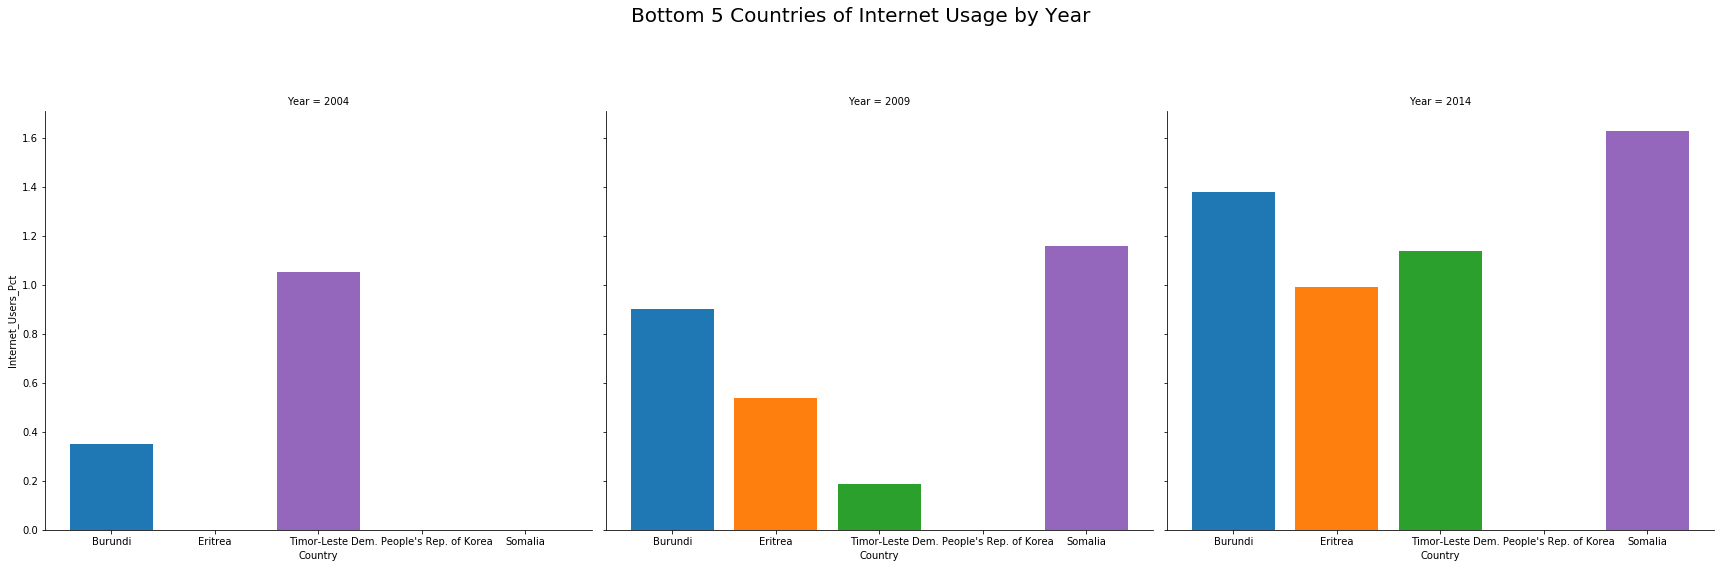

In [60]:
g = sns.FacetGrid(bottom_5_internet, col="Year", hue = "Country", col_wrap=3, height = 8, legend_out = True)
g.map(plt.bar, "Country", "Internet_Users_Pct")
plt.subplots_adjust(top=0.8)
plt.suptitle("Bottom 5 Countries of Internet Usage by Year", fontsize = 20)

plt.show()
plt.show()

Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita for those 5 countries. Use a seaborn facet grid for this.

1. Macao SAR, China
2. Qatar
3. Luxembourg
4. Singapore
5. Brunei

The 10-year trend df  for the top 5 countries in 2014 = top_5_gdp

In [61]:
gdp_top_5 = gdp_internet_2014.sort_values('GDP_Per_Capita', ascending=False)
gdp_top_5.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
127,"Macao SAR, China",2014,130439.10670,NaN
176,Qatar,2014,116693.50770,91.49
126,Luxembourg,2014,92349.18643,94.67
188,Singapore,2014,81965.36107,82.00
24,Brunei,2014,76448.59333,NaN


In [62]:
top_5_gdp   = gdp_and_internet_use[(gdp_and_internet_use.Country.isin(["Macao SAR, China", "Qatar", "Luxembourg",
                                                                               "Singapore", "Brunei"]))
                                       & (gdp_and_internet_use.Year.isin(["2004", "2014"]))]

top_5_gdp = top_5_gdp.reset_index(drop=True)
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Brunei,2014,76448.59333,NaN
1,Brunei,2004,83963.23807,NaN
2,Luxembourg,2014,92349.18643,94.67
3,Luxembourg,2004,87209.81937,65.88
4,"Macao SAR, China",2014,130439.10670,NaN
5,"Macao SAR, China",2004,60791.97685,NaN
6,Qatar,2014,116693.50770,91.49
7,Qatar,2004,117271.42710,20.70164785
8,Singapore,2014,81965.36107,82
9,Singapore,2004,59732.95854,62


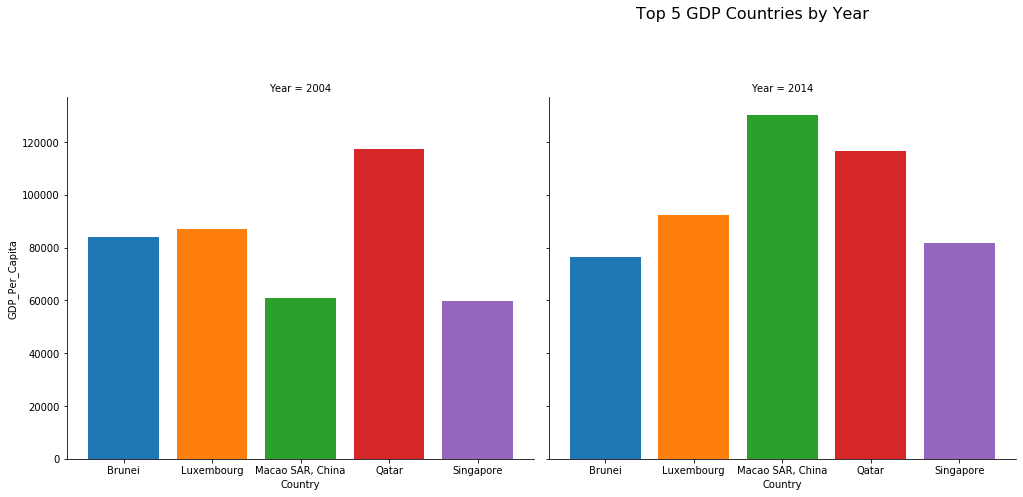

In [63]:
g = sns.FacetGrid(top_5_gdp, col="Year", hue = "Country", col_wrap=3, height = 7, legend_out = True)
g.map(plt.bar, "Country", "GDP_Per_Capita")
plt.subplots_adjust(top=0.8)
plt.suptitle("Top 5 GDP Countries by Year", fontsize = 16)

plt.show()

Text(0.5, 0.98, '10-Year Trend of the Top 5 Countries Based on GDP Per Capita')

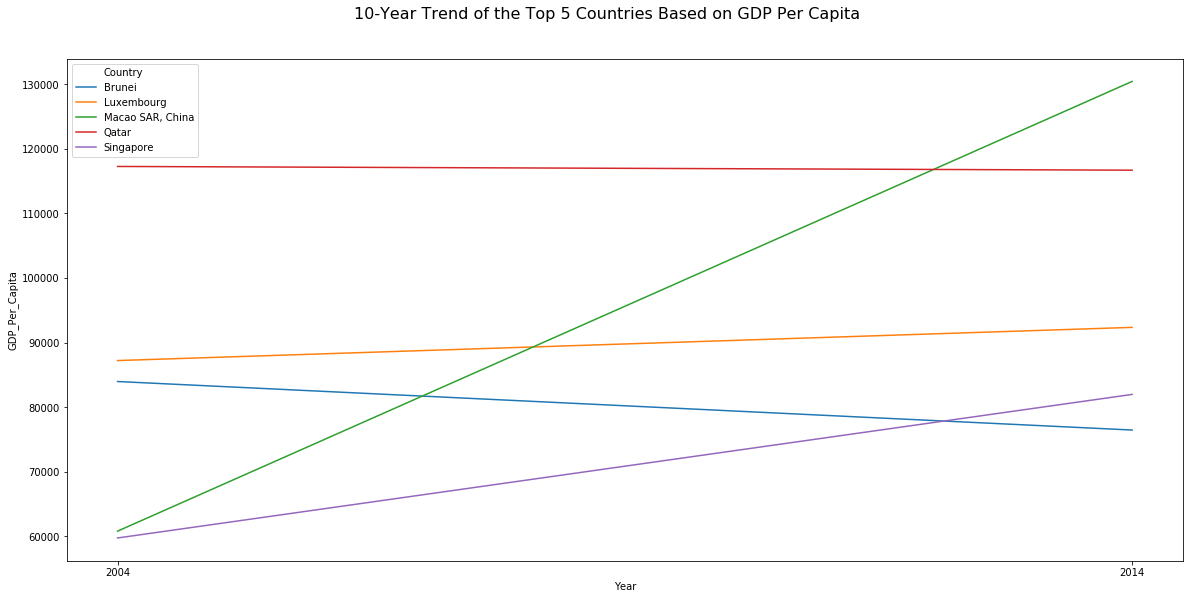

In [64]:
#I wanted to see what a 10-year line plot looked like as well

plt.figure(figsize=(20,9) )
g = sns.lineplot(data=top_5_gdp, x='Year',y='GDP_Per_Capita', hue = "Country")
plt.subplots_adjust(top=0.9)
plt.suptitle("10-Year Trend of the Top 5 Countries Based on GDP Per Capita", fontsize = 16)

Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.
1. The 10-year trend df for the bottom 5 countries in 2014 = bottom_5_gdp

In [65]:
gdp_bottom_5 = gdp_internet_2014.sort_values('GDP_Per_Capita', ascending=True)
gdp_bottom_5.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
35,Central African Republic,2014,672.681648,NaN
27,Burundi,2014,768.469837,1.38
48,Dem. Rep. Congo,2014,784.872656,NaN
155,Niger,2014,900.136918,1.95
129,Malawi,2014,1142.530804,5.83


In [66]:
bottom_5_gdp   = gdp_and_internet_use[(gdp_and_internet_use.Country.isin(["Central African Republic", "Burundi", "Dem. Rep. Congo",
                                                                               "Niger", "Malawi"]))
                                       & (gdp_and_internet_use.Year.isin(["2004", "2014"]))]

bottom_5_gdp = bottom_5_gdp.reset_index(drop=True)
bottom_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Burundi,2014,768.469837,1.38
1,Burundi,2004,708.833720,0.349060462
2,Central African Republic,2014,672.681648,NaN
3,Central African Republic,2004,848.689032,NaN
4,Dem. Rep. Congo,2014,784.872656,NaN
5,Dem. Rep. Congo,2004,577.483297,NaN
6,Malawi,2014,1142.530804,5.83
7,Malawi,2004,862.392438,0.347505335
8,Niger,2014,900.136918,1.95
9,Niger,2004,757.751262,0.189933734


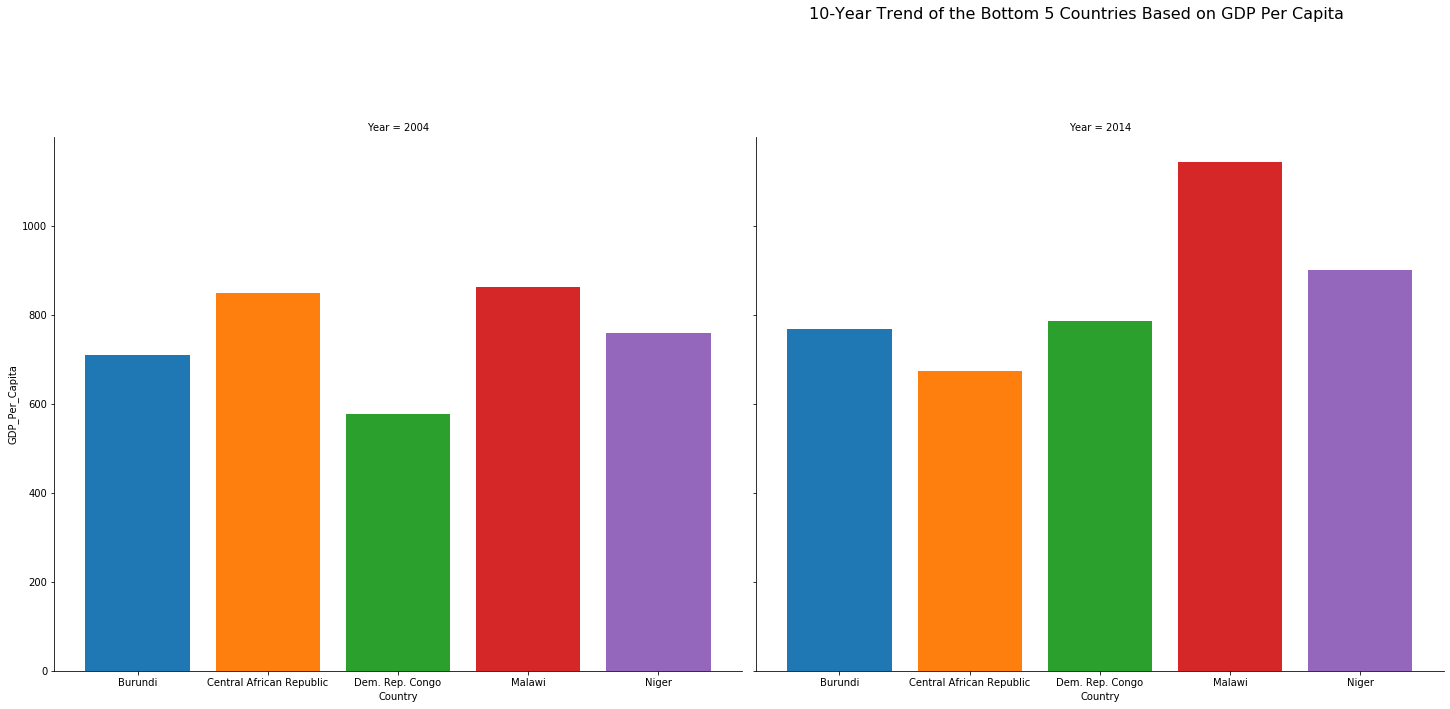

In [67]:
g = sns.FacetGrid(bottom_5_gdp, col="Year", hue = "Country", col_wrap=3, height = 10, legend_out = True)
g.map(plt.bar, "Country", "GDP_Per_Capita")
plt.subplots_adjust(top=0.8)
plt.suptitle("10-Year Trend of the Bottom 5 Countries Based on GDP Per Capita", fontsize = 16)
plt.show()

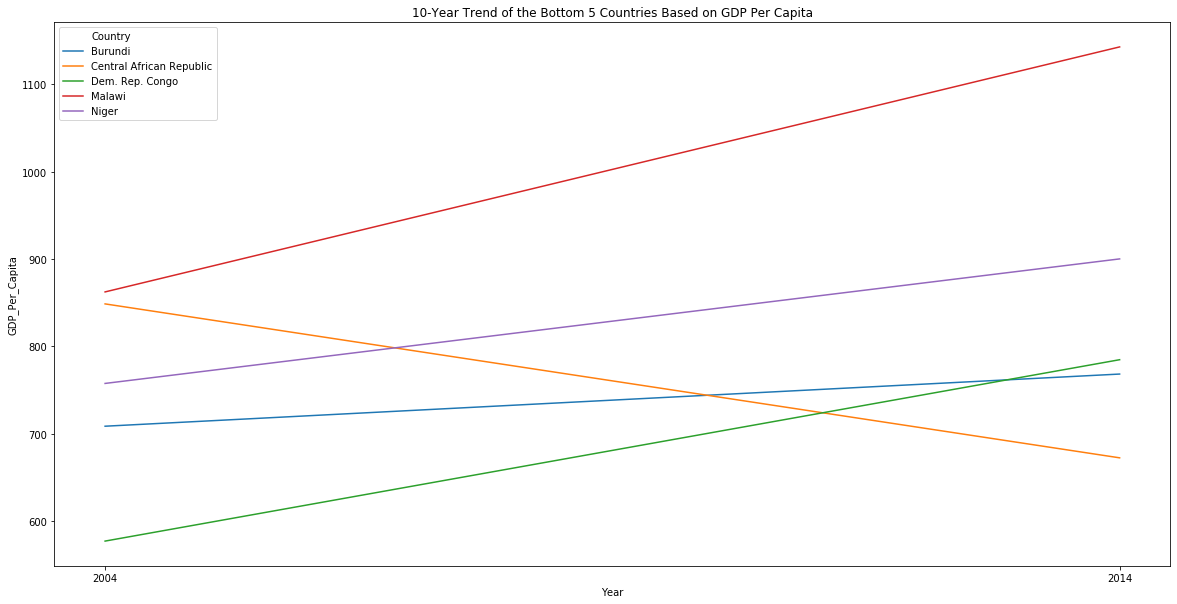

In [68]:
#I wanted to see what a 10-year line plot looked like as well


plt.figure(figsize=(20,10) )
g = sns.lineplot(data=bottom_5_gdp, x='Year',y='GDP_Per_Capita', hue = "Country")
# g.set(ylim=(0,90000)) - this changes the range of the y-axis. Use g.set(xlim=(bottom#, top#)) to change the range of the x-axis
plt.title("10-Year Trend of the Bottom 5 Countries Based on GDP Per Capita")
plt.show()

Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?
1. All of the Bottom 5 Countries are in Africa
2. Macao SAR, China's GDP increased by 114% from 2004 to 2014. 
        a. Macau's gaming industry is the largest in the world, generating over MOP195 billion (US$24 billion) in revenue and about seven times larger 
            than that of Las Vegas.[10] Macau's gambling revenue was $37 billion in 2018.
        b. Following the transfer from Portugal to China, Macau liberalised its casino industry to allow foreign investors, starting a new period of 
            economic development. The regional economy grew by a double-digit annual growth rate from 2002 to 2014, making Macau one of the 
            richest economies in the world on a per capita basis
3. The GDP for the Central African Republic declined by <21%> between 2004 and 2014, while the other countries' GDP increased.
         a. In the 40 years since independence, the CAR has made slow progress toward economic development. Economic mismanagement, poor
         infrastructure, a limited tax base, scarce private investment, and adverse external conditions have led to deficits in both its budget and external 
         trade. Its debt burden is considerable, and the country has seen a decline in per capita gross national product over the last 40 years.

# BONUS: Child Marriage Data with GDP & Internet Usage Data

In [69]:
child_df = pd.read_csv('../data/child_marriage.csv')
child_df.head()

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Armenia,Rural Female 20-24 yr,2000,UNICEF_ChildInfo Database_Aug2007,Percent,31.0,NaN
1,Armenia,Total Female 20-24 yr,2000,UNICEF_ChildInfo Database_Aug2007,Percent,19.0,NaN
2,Armenia,Urban Female 20-24 yr,2000,UNICEF_ChildInfo Database_Aug2007,Percent,12.0,NaN
3,Bangladesh,Rural Female 20-24 yr,1999/2000,UNICEF_ChildInfo Database_Aug2007,Percent,72.0,NaN
4,Bangladesh,Total Female 20-24 yr,1999/2000,UNICEF_ChildInfo Database_Aug2007,Percent,65.0,NaN


In [70]:
child_df.tail()

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
196,Zimbabwe,Total Female 20-24 yr,1999,UNICEF_ChildInfo Database_Aug2007,Percent,29.0,NaN
197,Zimbabwe,Urban Female 20-24 yr,1999,UNICEF_ChildInfo Database_Aug2007,Percent,21.0,NaN
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,fnSeqID,Footnote,NaN,NaN,NaN,NaN,NaN
200,1,Married/in union before age of 17 instead of 18.,NaN,NaN,NaN,NaN,NaN


In [71]:
print(child_df.info())
print()
print(child_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 7 columns):
Country or Area    200 non-null object
Subgroup           200 non-null object
Year               198 non-null object
Source             198 non-null object
Unit               198 non-null object
Value              198 non-null float64
Value Footnotes    27 non-null float64
dtypes: float64(2), object(5)
memory usage: 11.1+ KB
None

(201, 7)
